In [1]:
%matplotlib inline
import random

import matplotlib.pyplot as plt
import numpy as np

from model_evaluation import single_decoding_routine

In [10]:
# SIMULATION PARAMETERS
tree_path = "tree.json"
alphabet = ['A', 'C', 'T', 'G']
alphabetSize = len(alphabet)

nbState = 4
# transition matrix of the toy gene finder
A = np.zeros((nbState, nbState))
A[0, 1] = 1
A[1, 2] = 1
A[2, 3] = 0.33
A[2, 0] = 1 - A[2, 3]
A[3, 3] = 0.33  # 0.9999  # unrealistic ...
A[3, 0] = 1 - A[3, 3]

# state initial probability
b = np.array([0.25, 0.25, 0.26, 0.24])

animalNames = ["dog", "cat", "pig", "cow", "rat", "mouse", "baboon",
               "human"]
n_species = len(animalNames)
"""[...], such as the higher average rate of substitution and the greater
transition/transversion ratio, in noncoding and third-codon-position sites
than in firstand second- codon-position sites[...]"""

pi = np.random.uniform(0.15, 0.35, (nbState, alphabetSize))
pi /= pi.sum(axis=1)[:, None]

# translation/transversion rate
kappa = np.array([2.3, 2.7, 4.3, 5.4])

In [12]:
# MONTE-CARLO PARAMETERS
n_nucleotids = 1000
n_simulations = 100

In [13]:
# Precision, sensitivity and specificity
precision, sensitivity, specificity = np.zeros(n_simulations), np.zeros(n_simulations), np.zeros(n_simulations)
for i in range(n_simulations):
    precision[i], sensitivity[i], specificity[i] = single_decoding_routine(tree_path, n_nucleotids, alphabet, 
                                                                           A, b, n_species, pi, kappa)
summary = {
    "precision": np.mean(precision),
    " sensitivity": np.mean(sensitivity),
    "specificity": np.mean(specificity)
          }


/home/zaccharie/workspace/PGM/Project/phylo-hmm/viterbi_sumproduct.py:49: RuntimeWarning: divide by zero encountered in log
  prob = np.log(A[:, s]) + alpha_log[:, t - 1]


In [14]:
summary

{' sensitivity': 0.88960252785655936,
 'precision': 0.55024000000000006,
 'specificity': 0.41106356096791841}

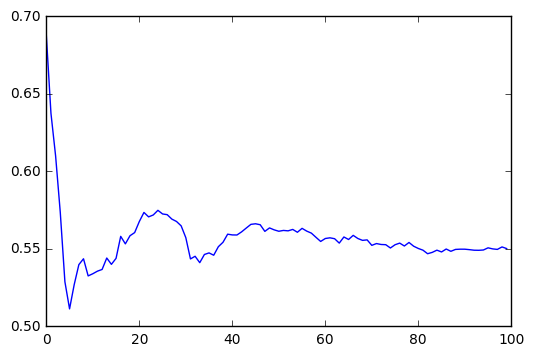

In [15]:
plt.plot(np.cumsum(precision) / (np.arange(len(precision))+1))
plt.show()

In [11]:
pi

array([[ 0.23754968,  0.18012877,  0.23012647,  0.35219508],
       [ 0.20128357,  0.27944802,  0.24819106,  0.27107735],
       [ 0.25522248,  0.23149273,  0.20805856,  0.30522623],
       [ 0.33194048,  0.19817461,  0.17386105,  0.29602386]])